# TensorFlow Autoencoder

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Import MNIST Dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./MNIST_data', one_hot=False)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


---

## Build Network

Hyperparams

In [3]:
learning_rate = 0.0001
batch_size    = 256

image_size    = 784
hidden_1_size = 256
hidden_2_size = 128
encoder_size  = 10

Placeholders

In [4]:
with tf.name_scope('Placeholder'):
    image = tf.placeholder(shape=[None, image_size], dtype=tf.float32, name='image')

Encoder

In [5]:
with tf.name_scope('Encoder'):
    """
      784 -> 256 -> 128 -> 10
    """
    encoder_hidden_1 = tf.layers.dense(
        inputs=image,
        units=hidden_1_size,
        activation=tf.nn.relu,
        name='Encoder_hidden_1'
    )
    encoder_hidden_2 = tf.layers.dense(
        inputs=encoder_hidden_1,
        units=hidden_2_size,
        activation=tf.nn.relu,
        name='Encoder_hidden_2'
    )
    encoder_output = tf.layers.dense(
        inputs=encoder_hidden_1,
        units=encoder_size,
        activation=tf.nn.relu,
        name='Encoder_output'
    )

Decoder

In [6]:
with tf.name_scope('Decoder'):
    """
      10 -> 128 -> 256 -> 784
    """
    decoder_hidden_2 = tf.layers.dense(
        inputs=encoder_output,
        units=hidden_2_size,
        activation=tf.nn.relu,
        name='Decoder_hidden_2'
    )
    decoder_hidden_1 = tf.layers.dense(
        inputs=decoder_hidden_2,
        units=hidden_1_size,
        activation=tf.nn.relu,
        name='Decoder_hidden_1'
    )
    decoder_output = tf.layers.dense(
        inputs=decoder_hidden_1,
        units=image_size,
        activation=tf.nn.relu,
        name='Decoder_output'
    )

Train & Loss

In [7]:
with tf.name_scope('Train_and_loss'):
    loss = tf.losses.mean_squared_error(labels=image, predictions=decoder_output)
    train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Train the network

In [59]:
sess = tf.Session()

# Init
sess.run(tf.global_variables_initializer())

for i in range(10001):
    sess.run(train, feed_dict={
        image: mnist.train.next_batch(batch_size)[0]
    })
    if i%1000 == 0:
        print("Loss", sess.run(loss, feed_dict={
            image: mnist.validation.next_batch(batch_size)[0]
        }))

Loss 0.111013
Loss 0.0344084
Loss 0.0313694
Loss 0.0309787
Loss 0.0283305
Loss 0.0285178
Loss 0.0258695
Loss 0.0270037
Loss 0.0258607
Loss 0.0254278
Loss 0.0250566


## Compare Images

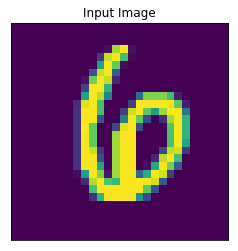

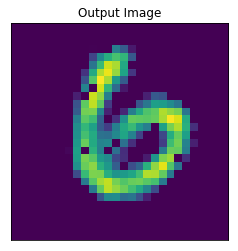

In [91]:
# Test encoding & decoding
encode_img = mnist.test.next_batch(1)[0]
decode_img = sess.run(decoder_output, feed_dict={image: encode_img})[0]

plt.figure()
plt.xticks(())
plt.yticks(())
plt.title('Input Image')
plt.imshow(encode_img[0].reshape((28, 28)))

plt.figure()
plt.xticks(())
plt.yticks(())
plt.title('Output Image')
plt.imshow(decode_img.reshape((28, 28)))
plt.show()

## See their clustering

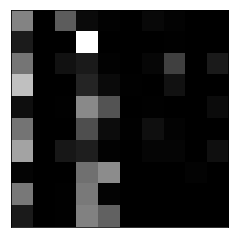

In [93]:
img_encodings = sess.run(encoder_output, feed_dict={image: mnist.test.images})  
img_clusters = np.argmax(img_encodings, axis=1).tolist()
img_labels = mnist.test.labels.tolist()

grid = np.zeros((10,10))
for label, cluster in zip(img_labels, img_clusters):
    grid[label][cluster] = grid[label][cluster] + 1
grid = grid / np.sum(grid, axis=1)

plt.imshow(grid, cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()